#  PSET 3 & CT #7
# Algorithmic Bias Detection
## Historical & Representation Bias in Training Sets



> By Jiahui Tang, Tiffany Yang, Xin Zeng

## Motivation & Set Up

**Context.** Investigative reports about digital financial services (DFS) have found instances of bias in the mechanisms that determine who a bank should loan money to. In many parts of the world, financial services are typically accessed based on an algorithmic assessment of their credit history. However, these systems have historically excluded consumers who are financially marginalized through intersecting forces of oppression. For example, in the US, African Americans are disproportionately denied home loans because of a legacy of policies and banking practices implemented decades ago that were designed to exclude Black individuals from home ownership (also known as [Red Lining](https://en.wikipedia.org/wiki/Redlining)). Beyond race or ethnicity, many other factors may contribute to unfair distribution of financial opportunities, such as an applicant's gender (often coded as sex), location, or age. 


In this example, you are a data scientist for a major credit bureau. Your organization is concerned that the data on which they have trained their machine learning assessment tools are leading to discriminatory outcomes. The company wants to knonw if their predictions have been innaccurate for specific subgroups of the population based on how their prediction of credit worthiness was proven to be a good or bad judgement given whether the candidate actually ended up defaulting on a loan or not. The company believes that if you can find patterns in the training set that reflect long-standing unfair social determinants of credit worthiness, they might be able to account for these in their model and reduce their contribution to unfair outcomes. Their goal is to begin to chip away at social impediments to accessing financial services by creating a more equitable credit scoring tool.

**Dataset.** This dataset includes information about individuals and their credit history (whether they had failed to pay their loans before, what other loans they had, etc.) The credit agency will train a model on this data to decide whether to approve individuals for a loan. The model will predict whether the individual will default (stop paying the loan, which is a bad outcome). In this retrospective dataset, we have information about what actually happened with each individual after they were given the loan. This will allow you to compare the predicted with the actual default for each individual, and aggregate those for different groups (for example by the variable `sex`) to see how the model's misclassifications were distributed in each group. You can find more information about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Statlog+%2528German+Credit+Data%2529)


## Case Outline

**1. Data Exploration**


1.1   Load in the German Credit Scoring Data set. You may choose to do this through the AIF360 Package (see [example code](https://nbviewer.jupyter.org/github/IBM/AIF360/blob/master/examples/tutorial_credit_scoring.ipynb)) or through the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29). Examine the data's summary statistics and provide several visualizations that will help you understand demographic group-level differences in the data.  **Briefly justify** your choices for data exploration, and your main findings (3-5 sentences).

1.2   Learn about the social context of the problem by reading and summarizing research on financial discrimination in the population. For more information on the dataset sampling techniques, visit the [hosting website](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29). From there, you will need to research other reputable sources to form an opinion about the relevant social context. You must cite your references. No more than 5 is necessary, but you may use as many as you would like. **Briefly summarize your findings** (3-5 sentences).

1.3   Look at the summary statistics of the data again to see if they reflect the social analysis provided in Step 2. **Interpret your findings** in 3-5 sentences.

1.4   Focus on two demographic variables: Sex, and Age under 25.  Compare the outcomes in each Sex group, and in each Age group. **Answer:** What group is privileged for Sex? Justify your answer (1-2 senttences) What group is privileged for Age? Justify your answer (1-2 sentences) What do you think are the sources of these disparities for Age? (1 paragraph) What do you think might be the source of these disparities for Sex? (1 paragraph)

1.5   Remember from the readings and lecture the concepts of *Historical Bias* and *Representation Bias*. **Answer:** Is this is an example of Historical Bias and/or Representation Bias? **Justify your answer** in 1-2 sentences.


**2. Bias Detection & Mitigation**


2.1 Go to: http://aif360.mybluemix.net/data This tool will fit a prediction model to the selected dataset, and analyze the model bias using different metrics. Note that the model that the tool will build relies on a cost matrix that assigns a different cost to each misclassification error. In this case, the cost for classifying someone as good when they are really bad is 5 times worse than classifying someone as bad when they are good.

2.1.1 Choose the German credit scoring demo.  **Answer:** Using this information, and the data exploration, think about what would constitute bias in this scenario. What is the source of this bias? 

2.1.2 Read the descriptions of the different bias metrics by clicking on the information icon (the little "i" in the top right corner of each graph). **Answer:** Is there any metric that you think is better/worse for this specific problem? (for this problem, you can ignore the Theil index) Justify your answer.

2.1.3 Read about the different debiasing options available. Are there any options that you think are more appropriate than others for this specific case? Are there any that are less appropriate? Choose a debiasing option, and click Next to look at the results.

2.1.4 Look at the results after the debiasing result. **Answer:** Did the bias metrics improve? What about the metric you considered important? Are you satisfied with the result? What happened with the overall model accuracy after applying this debiasing method? What is the tension? (2-3 paragraphs)

2.1.5 Think about the tension you identified in Step 2.1.4. **Answer:** Briefly describe whether you would recommend applying this debiasing method in this specific example. Justify your answer (1-3 paragraphs)

2.2 Suppose we are interested in the [intersectional](https://en.wikipedia.org/wiki/Intersectionality#:~:text=Intersectionality%20broadens%20the%20lens%20of,immigrant%20women%2C%20and%20other%20groups.) disparate impact of `sex` *and* `age`. **Answer:** What would you expect to find in the demo if sex and age were combined to create new privileged/unprivileged groups? What would be your debiasing recommendations  in this scenario? **Hint:** You may find it helpful to run summary statistics and visualizations on the dataset with individuals grouped by both `sex` and `age`.

### Question 1

#### Problem 1.1

In [1]:
!pip install aif360
!pip install fairlearn

     |████████████████████████████████| 184kB 5.7MB/s 
     |████████████████████████████████| 358kB 35.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491622 sha256=d36f8ab7873bda2030a58cf064453a5ac9d1dedc2ec0325404a11a8f7b270969
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-cp37-none-any.whl size=30180 sha256=336b3f7f2db9ce9bf877275afc73945aa7bdc7fe55ede9f3c74c05a6abfbb738
  Stored in directory: /root/.cache/pip/wheels/02/e4/0b/aaab481fc5dd2a4ea59e78bc7231bb6aae7635ca7ee79f8ae5
Successfully built shap memory-profiler
     |████████████████████████████████| 24.6MB 167kB/s 


In [2]:
import numpy as np
np.random.seed(0)

from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

from IPython.display import Markdown, display

In [4]:
df = GermanDataset().convert_to_dataframe()[0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   month                            1000 non-null   float64
 1   credit_amount                    1000 non-null   float64
 2   investment_as_income_percentage  1000 non-null   float64
 3   residence_since                  1000 non-null   float64
 4   age                              1000 non-null   float64
 5   number_of_credits                1000 non-null   float64
 6   people_liable_for                1000 non-null   float64
 7   sex                              1000 non-null   float64
 8   status=A11                       1000 non-null   float64
 9   status=A12                       1000 non-null   float64
 10  status=A13                       1000 non-null   float64
 11  status=A14                       1000 non-null   float64
 12  credit_history=A30        

In [ ]:
df.describe()

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,sex,status=A11,status=A12,status=A13,status=A14,credit_history=A30,credit_history=A31,credit_history=A32,credit_history=A33,credit_history=A34,purpose=A40,purpose=A41,purpose=A410,purpose=A42,purpose=A43,purpose=A44,purpose=A45,purpose=A46,purpose=A48,purpose=A49,savings=A61,savings=A62,savings=A63,savings=A64,savings=A65,employment=A71,employment=A72,employment=A73,employment=A74,employment=A75,other_debtors=A101,other_debtors=A102,other_debtors=A103,property=A121,property=A122,property=A123,property=A124,installment_plans=A141,installment_plans=A142,installment_plans=A143,housing=A151,housing=A152,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202,credit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,0.810000,1.407000,1.155000,0.690000,0.274000,0.269000,0.063000,0.394000,0.040000,0.049000,0.530000,0.088000,0.293000,0.234000,0.103000,0.01200,0.181000,0.280000,0.01200,0.022000,0.050000,0.009000,0.097000,0.603000,0.103000,0.063000,0.048000,0.18300,0.062000,0.172000,0.339000,0.174000,0.253000,0.907000,0.041000,0.052000,0.282000,0.23200,0.332000,0.154000,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,0.392497,0.577654,0.362086,0.462725,0.446232,0.443662,0.243085,0.488879,0.196057,0.215976,0.499349,0.283437,0.455366,0.423584,0.304111,0.10894,0.385211,0.449224,0.10894,0.146757,0.218054,0.094488,0.296106,0.489521,0.304111,0.243085,0.213873,0.38686,0.241276,0.377569,0.473607,0.379299,0.434948,0.290578,0.198389,0.222138,0.450198,0.42232,0.471167,0.361129,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856,0.458487
min,4.000000,250.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000

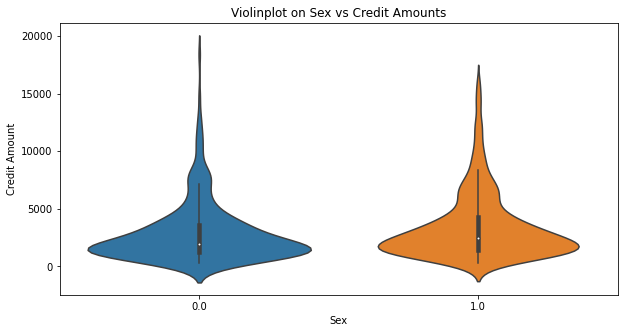

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.violinplot(x = df.sex, y=df["credit_amount"])
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Credit Amount', fontsize=10)
plt.title("Violinplot on Sex vs Credit Amounts")
plt.show()

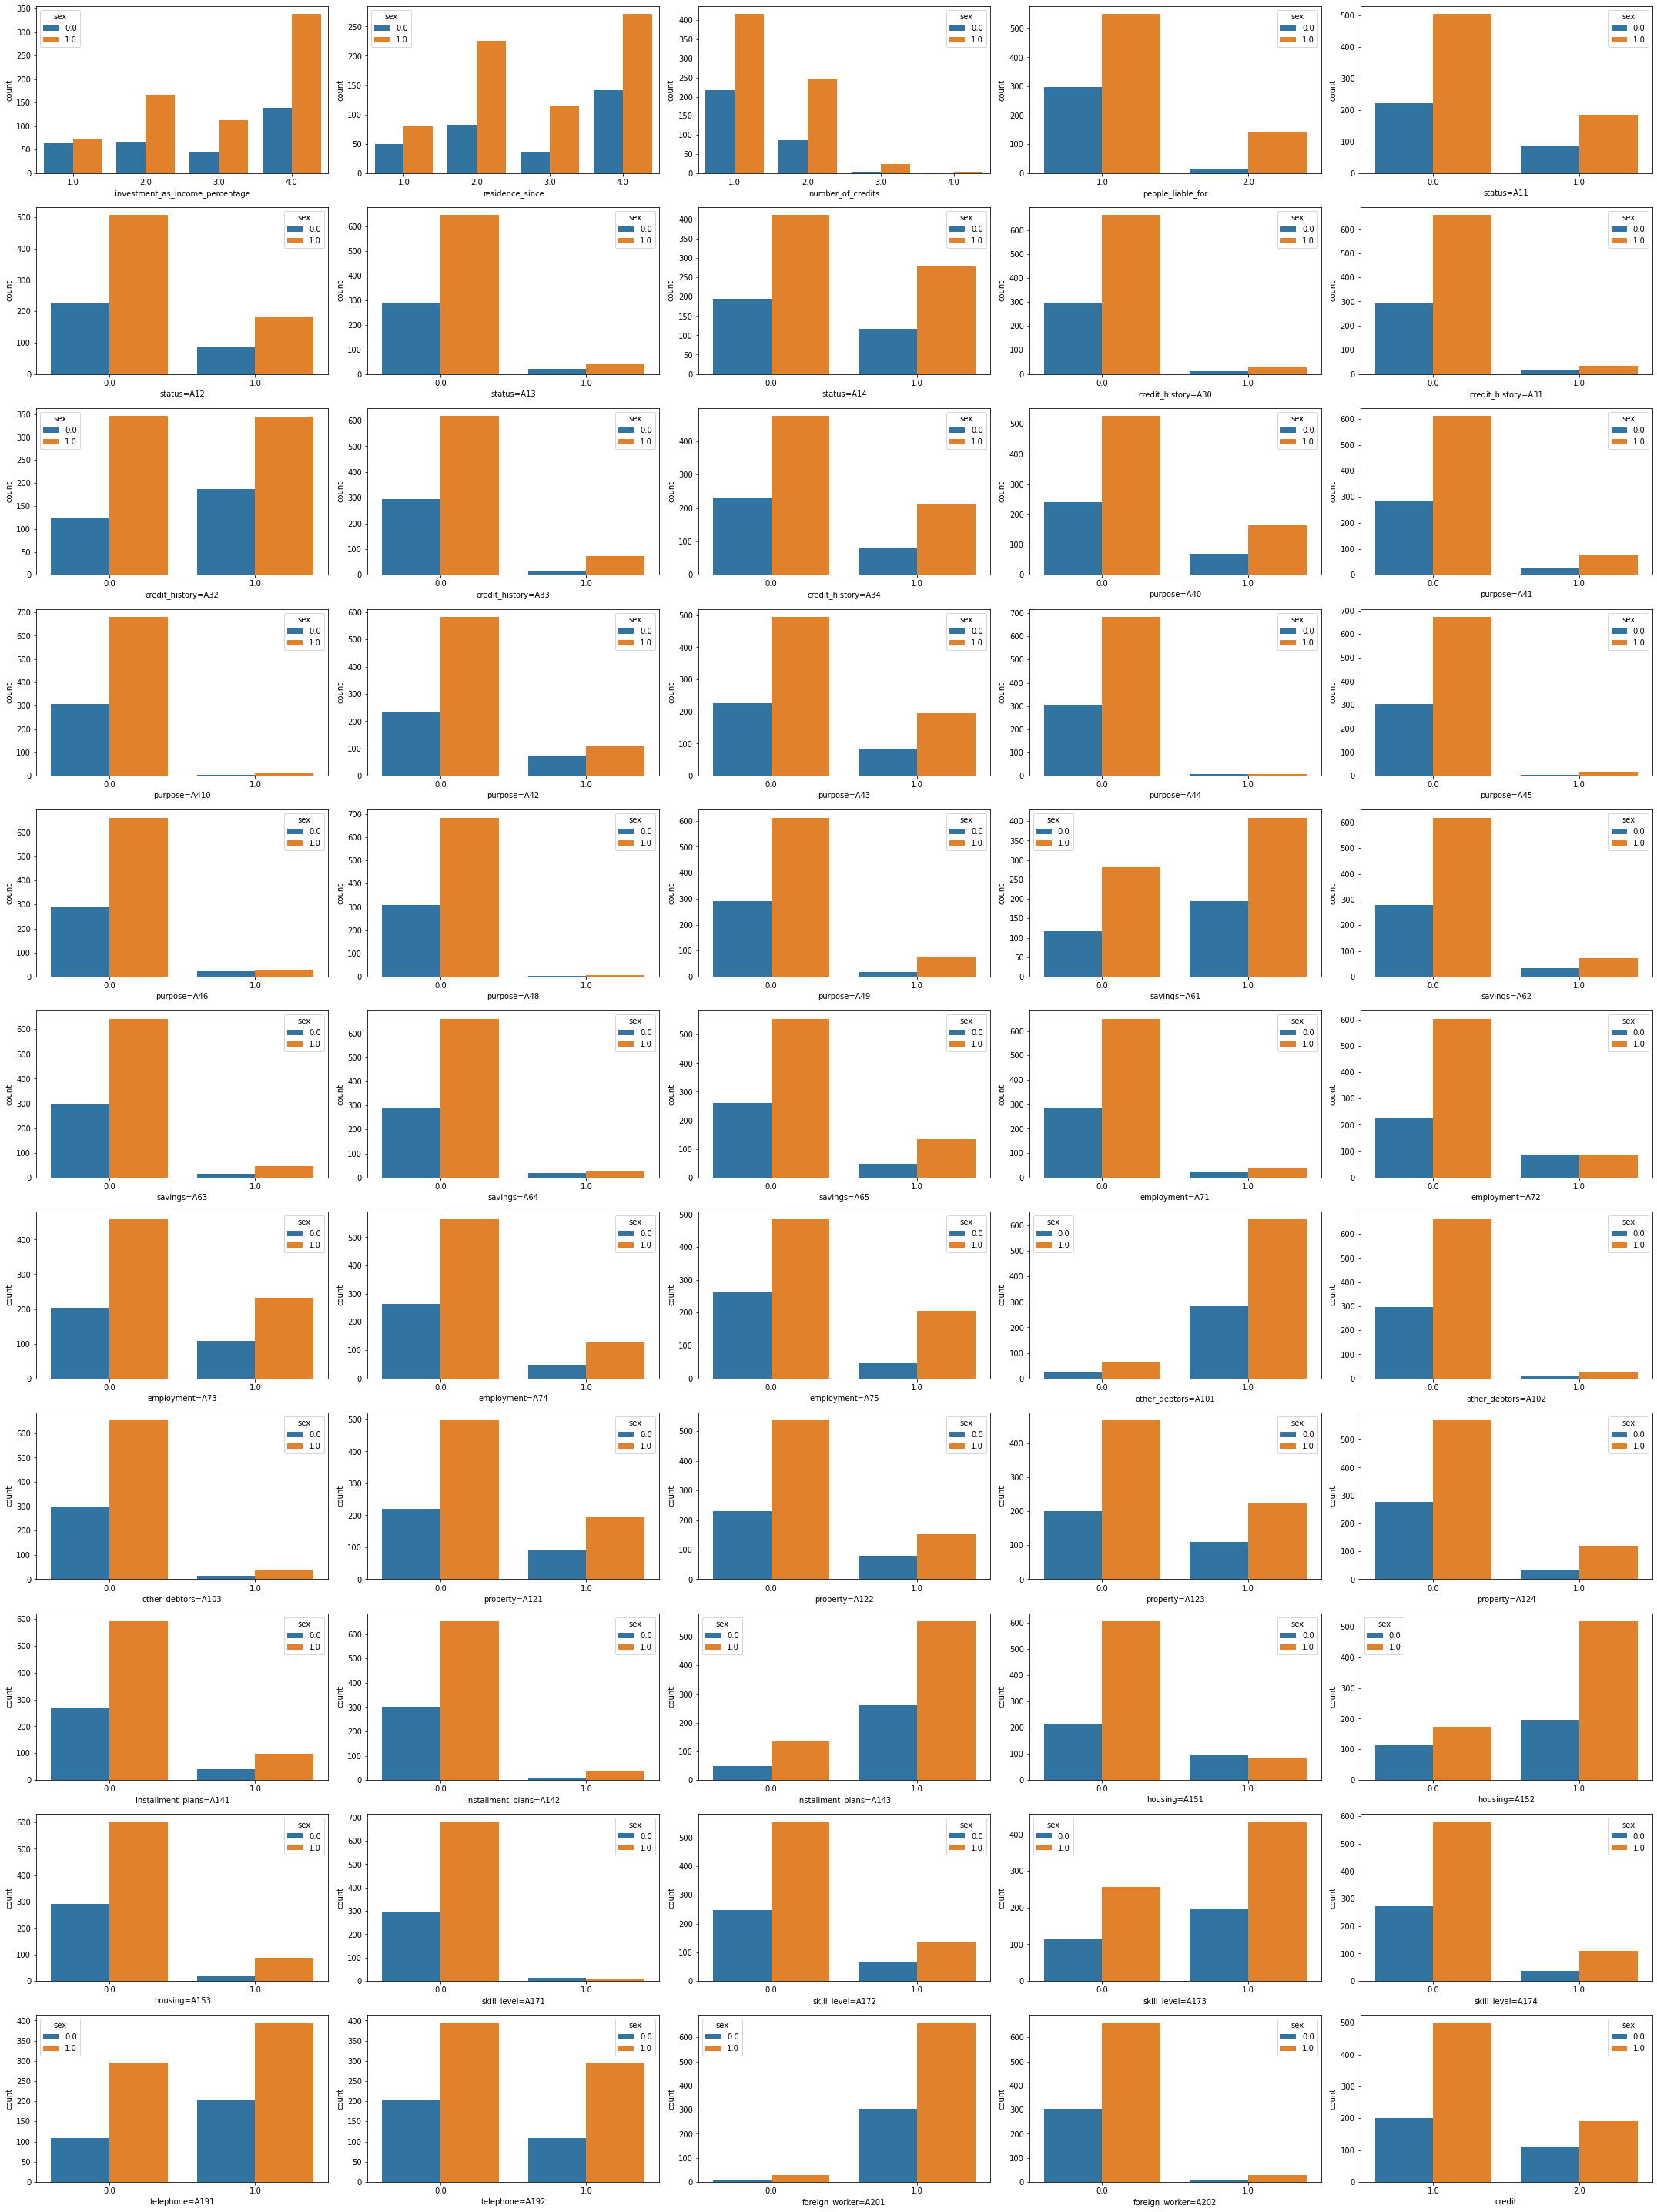

In [ ]:
cols = []
for col in df.columns:
    if col not in ["month", "credit_amount", "age", "sex"]:
        cols.append(col)

fig, axes = plt.subplots(11, 5, sharey=False, figsize=(30, 40))
for i, ax in enumerate(axes.flat):
    sns.countplot(x=cols[i], hue="sex", ax=ax, data=df)
    plt.xlabel(cols[i], fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
df.groupby(by=["sex"]).mean()

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,status=A11,status=A12,status=A13,status=A14,credit_history=A30,credit_history=A31,credit_history=A32,credit_history=A33,credit_history=A34,purpose=A40,purpose=A41,purpose=A410,purpose=A42,purpose=A43,purpose=A44,purpose=A45,purpose=A46,purpose=A48,purpose=A49,savings=A61,savings=A62,savings=A63,savings=A64,savings=A65,employment=A71,employment=A72,employment=A73,employment=A74,employment=A75,other_debtors=A101,other_debtors=A102,other_debtors=A103,property=A121,property=A122,property=A123,property=A124,installment_plans=A141,installment_plans=A142,installment_plans=A143,housing=A151,housing=A152,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202,credit
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,19.43871,2877.774194,2.829032,2.867742,0.661290,1.325806,1.045161,0.283871,0.277419,0.064516,0.374194,0.03871,0.054839,0.600000,0.051613,0.254839,0.225806,0.077419,0.009677,0.238710,0.274194,0.019355,0.016129,0.067742,0.009677,0.061290,0.625806,0.103226,0.051613,0.061290,0.158065,0.074194,0.277419,0.345161,0.151613,0.151613,0.912903,0.038710,0.048387,0.287097,0.254839,0.351613,0.106452,0.129032,0.032258,0.838710,0.306452,0.632258,0.061290,0.038710,0.206452,0.635484,0.119355,0.651613,0.348387,0.977419,0.022581,1.351613
1.0,21.56087,3448.040580,3.037681,2.834783,0.876812,1.443478,1.204348,0.269565,0.265217,0.062319,0.402899,0.04058,0.046377,0.498551,0.104348,0.310145,0.237681,0.114493,0.013043,0.155072,0.282609,0.008696,0.024638,0.042029,0.008696,0.113043,0.592754,0.102899,0.068116,0.042029,0.194203,0.056522,0.124638,0.336232,0.184058,0.298551,0.904348,0.042029,0.053623,0.279710,0.221739,0.323188,0.175362,0.143478,0.053623,0.802899,0.121739,0.749275,0.128986,0.014493,0.197101,0.627536,0.160870,0.571014,0.428986,0.956522,0.043478,1.276812


> Based on the data visualization and summary statistics, we can see that the average credit amount for men is greater than the average credit amount for women. For some variables that indicate better repayment ability, like skill_level_A174, the average value of men tend to be higher. While for some variables that indicate worse repayment ability, like skill_level_A171, the average value of women tend to be higher. Besides, for the majority of variables, nearly the number of men for each category in those variables dominates women.

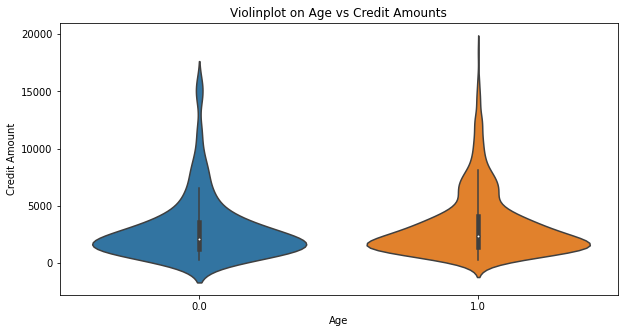

In [18]:
plt.figure(figsize=(10,5))
sns.violinplot(x = df.age, y=df["credit_amount"])
plt.xlabel('Age', fontsize=10)
plt.ylabel('Credit Amount', fontsize=10)
plt.title("Violinplot on Age vs Credit Amounts")
plt.show()

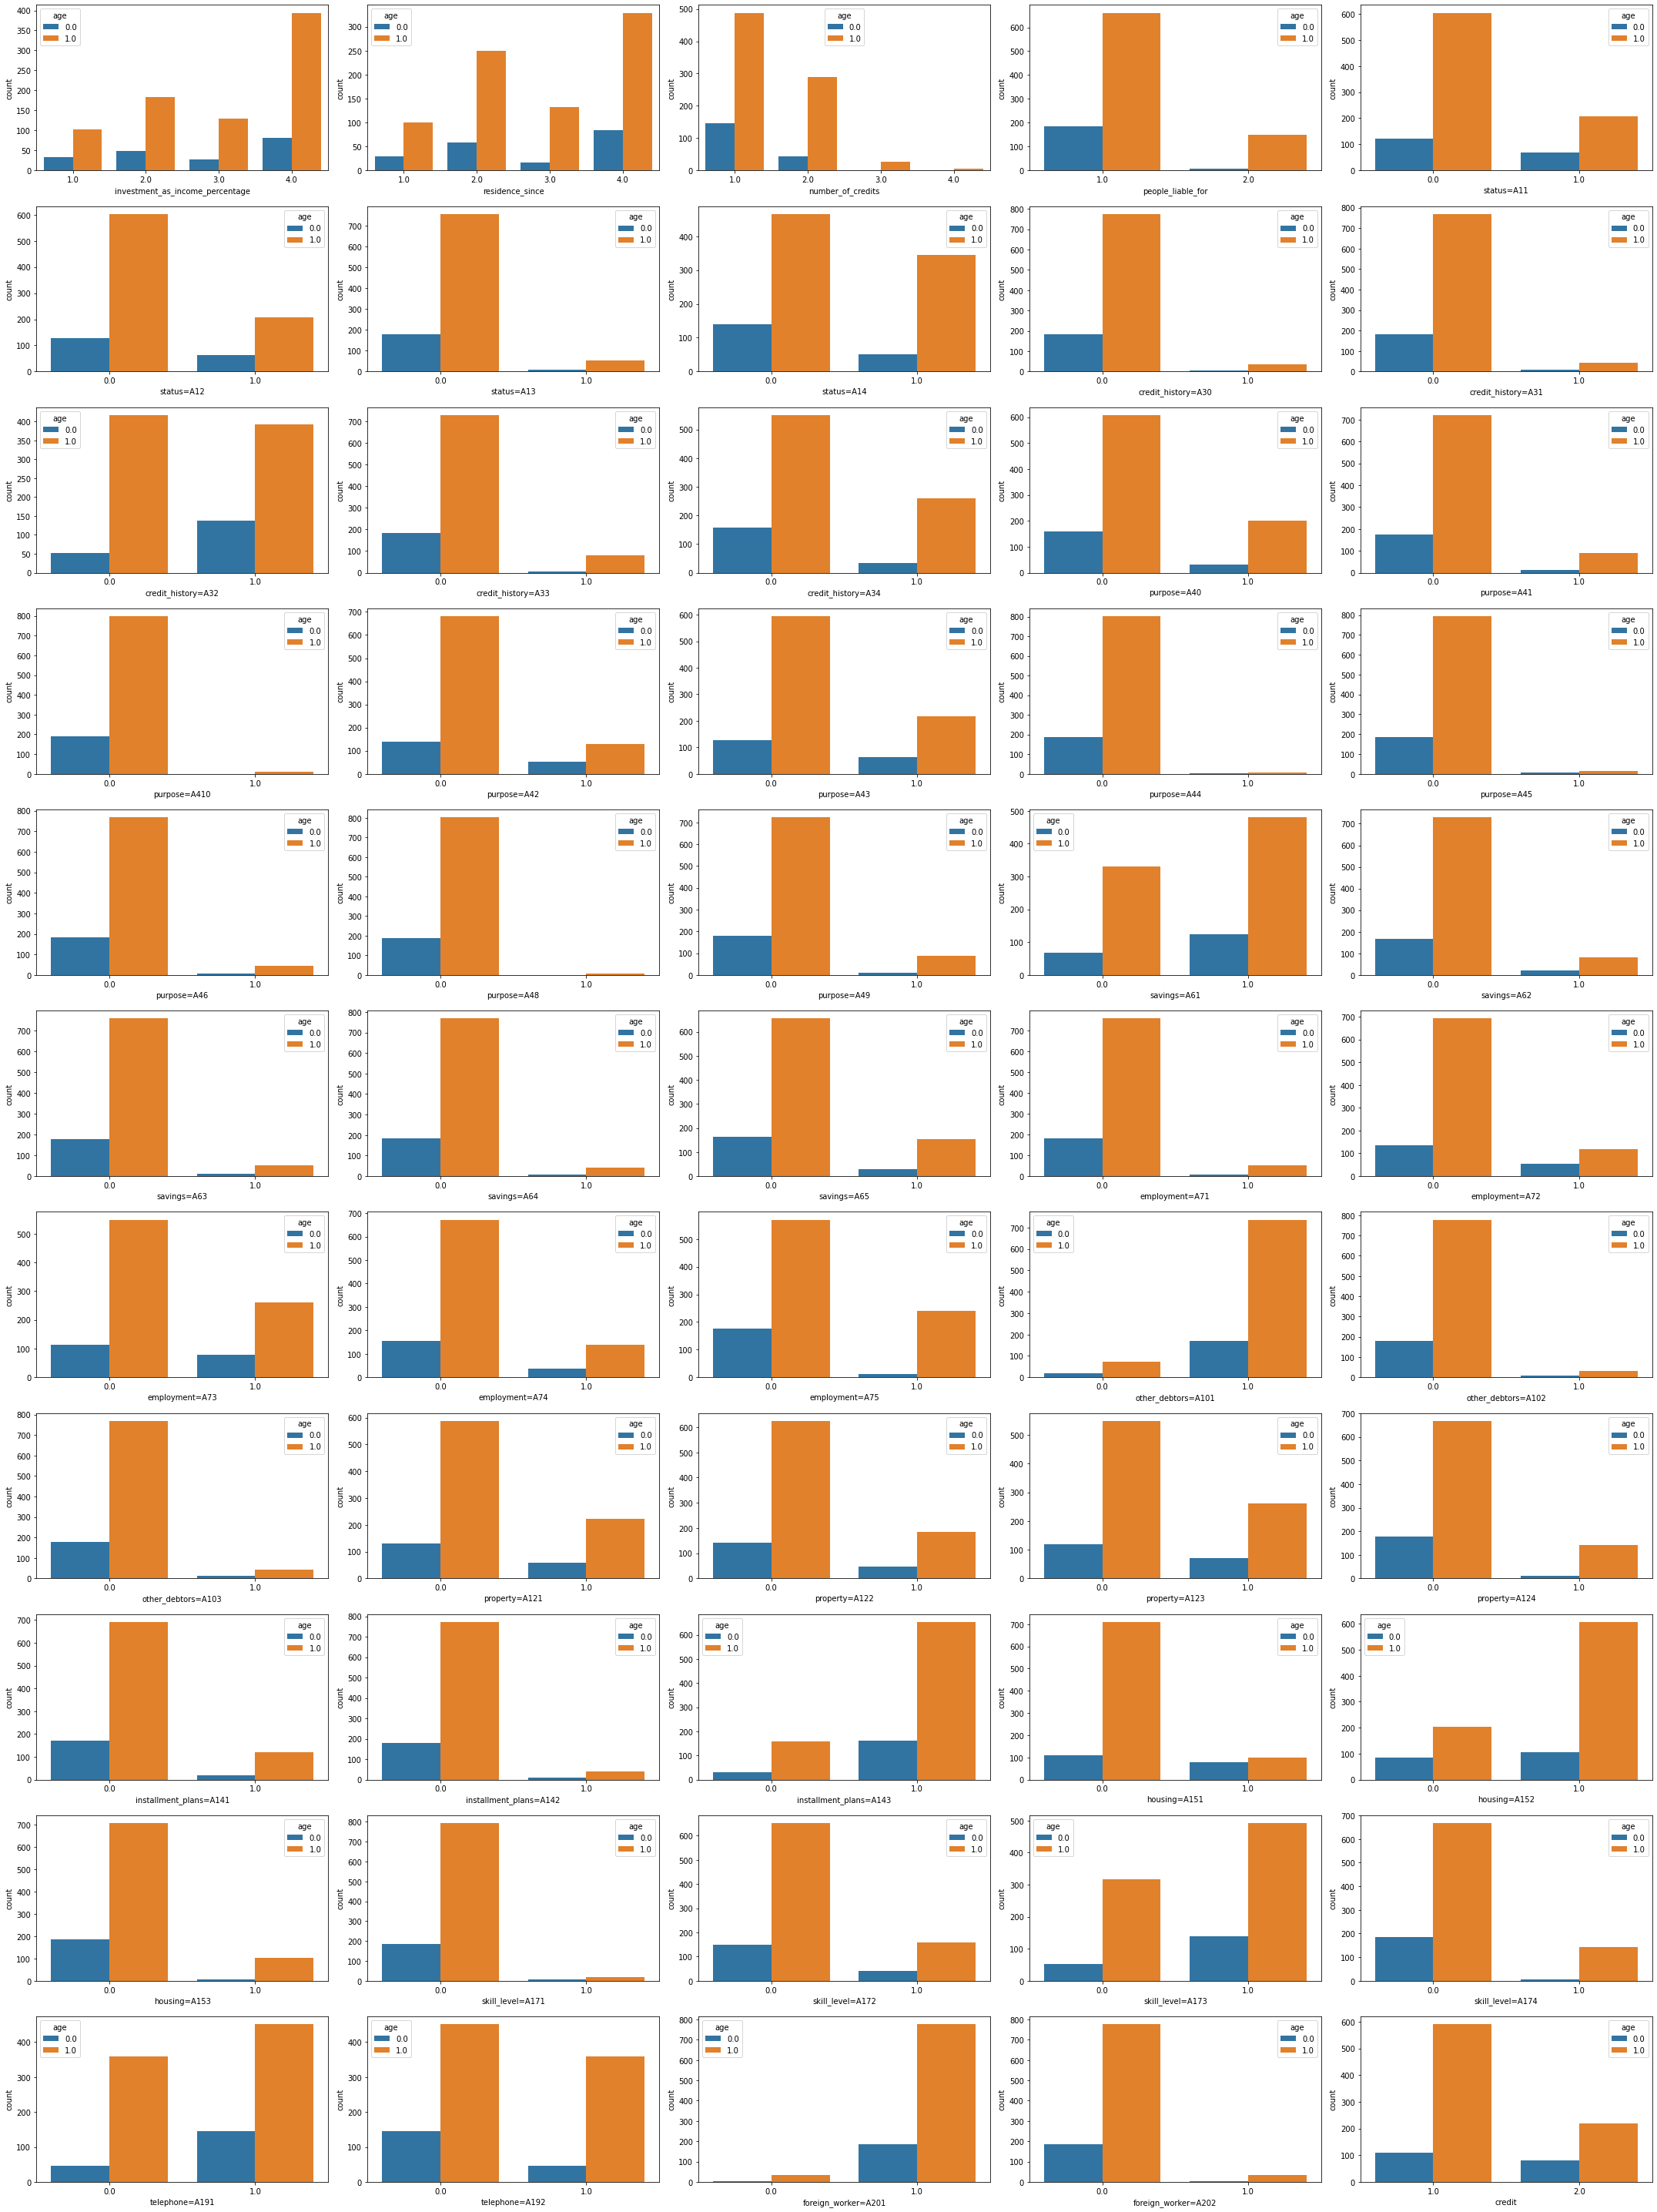

In [ ]:
fig, axes = plt.subplots(11, 5, sharey=False, figsize=(30, 40))
for i, ax in enumerate(axes.flat):
    sns.countplot(x=cols[i], hue="age", ax=ax, data=df)
    plt.xlabel(cols[i], fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
df.groupby(by=["age"]).mean()

,month,credit_amount,investment_as_income_percentage,residence_since,number_of_credits,people_liable_for,sex,status=A11,status=A12,status=A13,status=A14,credit_history=A30,credit_history=A31,credit_history=A32,credit_history=A33,credit_history=A34,purpose=A40,purpose=A41,purpose=A410,purpose=A42,purpose=A43,purpose=A44,purpose=A45,purpose=A46,purpose=A48,purpose=A49,savings=A61,savings=A62,savings=A63,savings=A64,savings=A65,employment=A71,employment=A72,employment=A73,employment=A74,employment=A75,other_debtors=A101,other_debtors=A102,other_debtors=A103,property=A121,property=A122,property=A123,property=A124,installment_plans=A141,installment_plans=A142,installment_plans=A143,housing=A151,housing=A152,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202,credit
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,20.705263,3003.357895,2.831579,2.815789,1.242105,1.031579,0.447368,0.357895,0.326316,0.052632,0.263158,0.026316,0.042105,0.721053,0.036842,0.173684,0.168421,0.073684,0.000000,0.273684,0.336842,0.021053,0.031579,0.036842,0.005263,0.052632,0.647368,0.115789,0.057895,0.031579,0.147368,0.047368,0.284211,0.410526,0.189474,0.068421,0.894737,0.047368,0.057895,0.315789,0.247368,0.373684,0.063158,0.105263,0.047368,0.847368,0.415789,0.557895,0.026316,0.026316,0.221053,0.726316,0.026316,0.763158,0.236842,0.984211,0.015789,1.421053
1.0,20.949383,3334.098765,3.006173,2.851852,1.445679,1.183951,0.746914,0.254321,0.255556,0.065432,0.424691,0.043210,0.050617,0.485185,0.100000,0.320988,0.249383,0.109877,0.014815,0.159259,0.266667,0.009877,0.019753,0.053086,0.009877,0.107407,0.592593,0.100000,0.064198,0.051852,0.191358,0.065432,0.145679,0.322222,0.170370,0.296296,0.909877,0.039506,0.050617,0.274074,0.228395,0.322222,0.175309,0.146914,0.046914,0.806173,0.123457,0.749383,0.127160,0.020988,0.195062,0.607407,0.176543,0.556790,0.443210,0.958025,0.041975,1.271605


> Based on the data visualization and summary statistics, we can see that the average credit amount for the old (age >=25) is greater than the average credit amount for the young (age < 25). For some variables that indicate better repayment ability, like skill_level_A174, the average value of the old tend to be higher. While for some variables that indicate worse repayment ability, like skill_level_A171, the average value of the young tend to be higher. Besides, for the majority of variables, nearly the number of the old for each category in those variables dominates the young.

#### Question 1.2 

As amended in 1976, the Equal Credit Opportunity Act (ECOA) outlawed discrimination in granting credit on the basis of race, color, religion, national origin, sex or marital status, and age (Public Law 94-239), implying a historical concern that the use of credit scoring may unfairly affect minorities and other populations and the long history of anti-discrimination efforts. After reviewing relevant research on this topic, we conclude that empirical evidence supporting the existence of financial discrimination is only found in certain areas and only for certain groups. As for racial minorities, studies using survey data containing information on the proxies of the provision of financial services [1] and data that combines a nationally representative sample of credit bureau records reveal no disparate impact by race [2], whereas redlining lawsuits regarding getting mortgages have been frequently filed across the states in recent years [3]. Regarding gender groups, no significant differences in default rates between men and women for most types of loans are documented, with the exceptions that women default at a disproportionately higher rate on used car loans and a disproportionately lower rate on home improvement loans [4]. Finally, evidence regarding disparate impact by age suggests that the use of variables related to an individual’s credit history appearing to lower the credit scores of older individuals [2], yet it has been argued that discrimination is not necessarily involved, since this group also tends to demand less credit [5].

***Reference:***

[1] Lindley, J. T., Selby, Jr., E. B., & Jackson, J. D. (1984). Racial discrimination in the provision of financial services. The American Economic Review, 74, 735-741. Retrieved from: https://www.jstor.org/stable/1805137

[2] Avery, R., Brevoort, K., & Canner, G. (2010). Does Credit Scoring Produce a Disparate Impact? Real Estate Economics, 40, 1-52. doi:  10.2139/ssrn.1726601

[3] Rachel L. Swarns, Biased Lending Evolves, and Blacks Face Trouble Getting Mortgages, N.Y. TIMES (Oct. 30 2015), http://www.nytimes.com/2015/10/31/nyregion/hudson-city-bank- settlement.html 

[4] Ellieiiausen, G. E., & Durkin, T. A. (1989). Theory and evidence of the impact of equal credit opportunity: An agonistic review of the literature. Journal of Financial Services Research, 2, 89-114. 

[5] Brandt, W. K. and Shay, R. P. "Consumers' Perceptions of Discriminatory Treatment and Credit Availability, and Access to Consumer Credit Markets." In The Regulation of Financial Institutions. Conference Series No. 21. Boston: Federal Reserve Bank of Boston, 1979.

#### Problem 1.3

The average credit amount for men is 3448, which is higher than that for women (2878). This can be seen as a clue of gender disparities regarding the provision of financial services that deviates from what has been documented in prior research, given the assumption that individuals with more credits are more likely to receive a loan. When looking at the purpose of loans specifically, although we found that compared to other purposes, women are more likely to receive car loans and home improvement loans (e.g., furniture/equipment and radio/television that can be generally) — the types of loans that have been documented by prior research, we don’t have data on the rates of these loans to compare findings from the German datasets with prior findings on gender disparities in these loan rates. As for the summary statistics for different age groups, we found that the average credit amount for individuals above 25 is 3334, which is higher than that for individuals under 25 (3003), suggesting a higher chance for the older group to receive loans. This finding is divergent from prior findings that older individuals tend to have lower credit scores; yet it is worth noting that unlike our approach of dividing age groups, prior research divides the age group as under vs. above 62, which may explain the detected divergence. 

#### Problem 1.4

In [ ]:
dataset_sex = GermanDataset(
    protected_attribute_names=['sex'],           # this dataset also contains protected
                                                 # attribute for "sex" which we do not
                                                 # consider in this evaluation
    features_to_drop=['personal_status', 'age']  # ignore age-related attributes
)

In [ ]:
dataset_sex_train, dataset_sex_test = dataset_sex.split([0.7], shuffle=True, seed=221)

privileged_groups = [{'sex': 1.}]
unprivileged_groups = [{'sex': 0.}]

> Now that we've identified the protected attribute 'sex' and defined privileged and unprivileged values, we can use aif360 to detect bias in the dataset. One simple test is to compare the percentage of favorable results for the privileged and unprivileged groups, subtracting the former percentage from the latter. A negative value indicates less favorable outcomes for the unprivileged groups. This is implemented in the method called mean_difference on the BinaryLabelDatasetMetric class. The code below performs this check and displays the output.

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_sex_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.059960


> The previous step showed that the privileged group was getting 5.996% more positive outcomes in the training dataset. 

In [ ]:
metric_orig_test = BinaryLabelDatasetMetric(dataset_sex_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original test dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

#### Original test dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.116484


> The previous step showed that the privileged group was getting 11.6484% more positive outcomes in the testing dataset. This validates that men should be considered privileged.

In [ ]:
dataset_age = GermanDataset(
    protected_attribute_names=['age'],           # this dataset also contains protected
                                                 # attribute for "sex" which we do not
                                                 # consider in this evaluation
    privileged_classes=[lambda x: x < 25],      # age < 25 is considered privileged
    features_to_drop=['personal_status', 'sex'] # ignore sex-related attributes
)

In [ ]:
dataset_age_train, dataset_age_test = dataset_age.split([0.7], shuffle=True, seed=221)

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_age_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.095770


> The previous step showed that the privileged group was getting 9.577% more negative outcomes in the training dataset. 

In [ ]:
metric_orig_test = BinaryLabelDatasetMetric(dataset_age_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original test dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

#### Original test dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.197421


> The previous step showed that the privileged group was getting 19.74% more negative outcomes in the training dataset.

> Based on the result, we know we find a wrong privileged group. age < 25 should not be considered privileged, instead age >= 25 should be considered privileged.

In [ ]:
dataset_age = GermanDataset(
    protected_attribute_names=['age'],           # this dataset also contains protected
                                                 # attribute for "sex" which we do not
                                                 # consider in this evaluation
    privileged_classes=[lambda x: x >= 25],      # age >= 25 is considered privileged
    features_to_drop=['personal_status', 'sex'] # ignore sex-related attributes
)

In [ ]:
dataset_age_train, dataset_age_test = dataset_age.split([0.7], shuffle=True, seed=221)

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_age_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.095770


> The previous step showed that the privileged group was getting 9.577% more positive outcomes in the training dataset.

In [ ]:
metric_orig_test = BinaryLabelDatasetMetric(dataset_age_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original test dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

#### Original test dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.197421


> The previous step showed that the privileged group was getting 19.74% more positive outcomes in the training dataset.

> This validates that age >= 25 should be considered privileged.

In [ ]:
import pandas as pd
pd.crosstab(df["age"], df["sex"], margins=True)

sex,0.0,1.0,All
age,,,
0.0,105,85,190
1.0,205,605,810
All,310,690,1000


In [ ]:
print(pd.crosstab(df["age"], df["credit_history=A30"], margins=True))
print(pd.crosstab(df["sex"], df["credit_history=A30"], margins=True))

credit_history=A30  0.0  1.0   All
age                               
0.0                 185    5   190
1.0                 775   35   810
All                 960   40  1000
credit_history=A30  0.0  1.0   All
sex                               
0.0                 298   12   310
1.0                 662   28   690
All                 960   40  1000


In [ ]:
print(pd.crosstab(df["age"], df["credit_history=A31"], margins=True))
print(pd.crosstab(df["sex"], df["credit_history=A31"], margins=True))

credit_history=A31  0.0  1.0   All
age                               
0.0                 182    8   190
1.0                 769   41   810
All                 951   49  1000
credit_history=A31  0.0  1.0   All
sex                               
0.0                 293   17   310
1.0                 658   32   690
All                 951   49  1000


In [ ]:
print(pd.crosstab(df["age"], df["credit_history=A32"], margins=True))
print(pd.crosstab(df["sex"], df["credit_history=A32"], margins=True))

credit_history=A32  0.0  1.0   All
age                               
0.0                  53  137   190
1.0                 417  393   810
All                 470  530  1000
credit_history=A32  0.0  1.0   All
sex                               
0.0                 124  186   310
1.0                 346  344   690
All                 470  530  1000


In [ ]:
print(pd.crosstab(df["age"], df["credit_history=A33"], margins=True))
print(pd.crosstab(df["sex"], df["credit_history=A33"], margins=True))

credit_history=A33  0.0  1.0   All
age                               
0.0                 183    7   190
1.0                 729   81   810
All                 912   88  1000
credit_history=A33  0.0  1.0   All
sex                               
0.0                 294   16   310
1.0                 618   72   690
All                 912   88  1000


In [ ]:
print(pd.crosstab(df["age"], df["credit_history=A34"], margins=True))
print(pd.crosstab(df["sex"], df["credit_history=A34"], margins=True))

credit_history=A34  0.0  1.0   All
age                               
0.0                 157   33   190
1.0                 550  260   810
All                 707  293  1000
credit_history=A34  0.0  1.0   All
sex                               
0.0                 231   79   310
1.0                 476  214   690
All                 707  293  1000


> **Sources of disparities for Age**: A glance of the age-related figures reveals that the counts of individuals aged above 25 (referring as “old group” hereafter) for all attributes are more than individuals aged under 25 (referring as “young group” hereafter). Indeed, summary statistics show that there are 810 individuals in the old group, as compared to 190 individuals in the young group. We would need more information on the proportion of these two age groups in 1994 to decide if the samples are under-representative for one group or the other. If so, this could be deemed as one source of disparities for age; namely that, the dataset is not representative and balanced enough to depict a complete picture of the credit history for individuals in one or both groups. Granting that the sampling strategy adopted by the researchers are flawless and the dataset is representative, there remains another source of disparity, which is how the world worked during that period of time. It is likely that young individuals were more likely to be credit invisible or had an unscored record simply because they were young and did not have a meaningful amount of financial transactions and records. Another source of disparities is that the model relies heavily on factors that naturally put older individuals in an advantaged positions, such as the years of employment, the amount of savings, and trustworthy credit history, all of which would be positively correlated with older individuals. However, determining if an individual is reliable when it comes to paying loans back duly goes beyond these factors, especially for young individuals. Factors such as SES, racial categorization, and education experience should also be considered in the model building. Relatedly, we noticed that in the German dataset, no racial information is given. With this in mind, it is possible that our predictions suffer from the aggregation bias, as the one-size-fit-all model may fail to depict the potentially different pictures when interactional effects of individuals from various age and racial groups are analysed.

> **Sources of disparities for Sex**: A glance of the sex-related figures reveals that the counts of men for all attributes are more than that of women. Indeed, summary statistics show that this dataset includes 690 men, as compared to 310 women. Given the fact that gender distribution in the population is approximately balanced throughout the history, this observation reflects a significant bias in sampling; namely that more men were being recruited than women, resulting in women being under-represented in this dataset and thus a potential source of disparities in the outcomes. The observed disparities may also arise from societal factors that put women in disadvantaged positions when it comes to their employment status, credit history, savings, and other factors that are taken into account by the model. For instance, gender difference in domestic responsibilities may prevent many females from decently paid jobs or even having a job. Relatedly, the model relies heavily on factors that privilege men while marginalizing women, such as the aforementioned attributes. It is worth considering other variables that may be linked to women’s possibility to pay loans back duly, such as marital status and their partners’ occupation and savings (these examples may only apply to the social context of this dataset but not applicable to modern society). Lastly, as discussed above for Age, there remains the possibility that our predictions regarding Sex suffer from the aggregation bias as well. The one-size-fit-all model may fail to depict the potentially different pictures when interactional effects of individuals from various sex and racial groups are analysed.

#### Problem 1.5

With the description above regarding sources of disparities for **Age**, we are pretty confident to contend that our findings can be seen as examples of Historical Bias, as age disparities in many of the attributes involved in the model could be rooted in the nature of the society when it comes to treating young vs. old individuals and have nothing to do with the adopted sampling strategy. Yet, we are conservative to put forth the argument that our findings can be seen as an example of Representation Bias, as more census data on these two age groups would be needed to make this statement.

With the description above regarding sources of disparities for **Sex**, we believe that our findings can be seen as examples of both Historical Bias and Representation Bias, as sex disparities in many of the attributes involved in the model could be rooted in the nature of the society when it comes to the societal and domestic roles played by men vs. women, and as the distribution of men and women for each attibute is far from equal, suggesting that women are underrepresented in this dataset. 

### Question 2

#### Problem 2.1.1

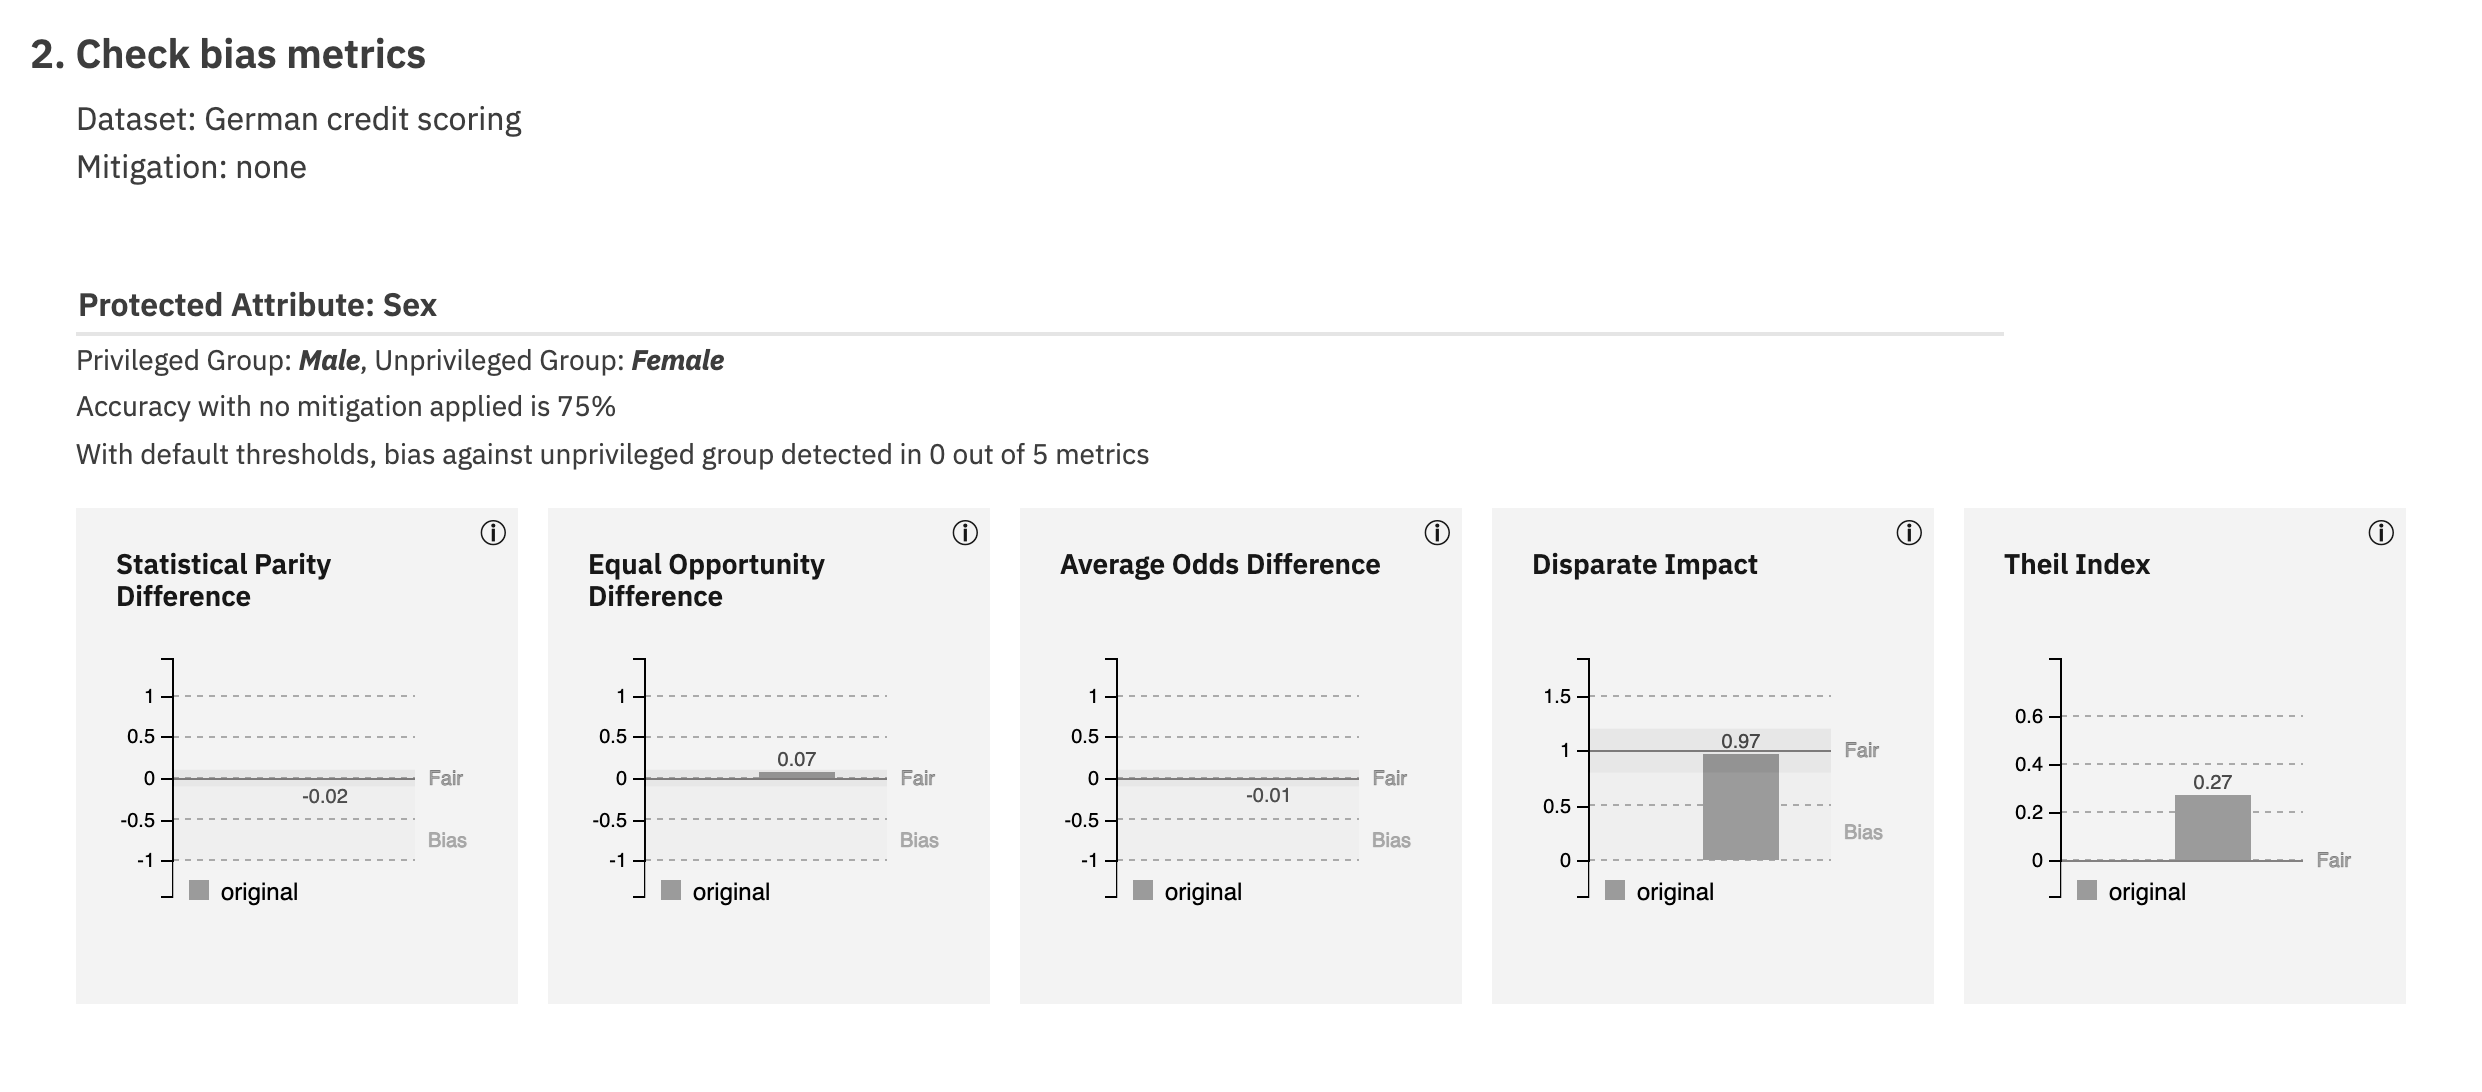

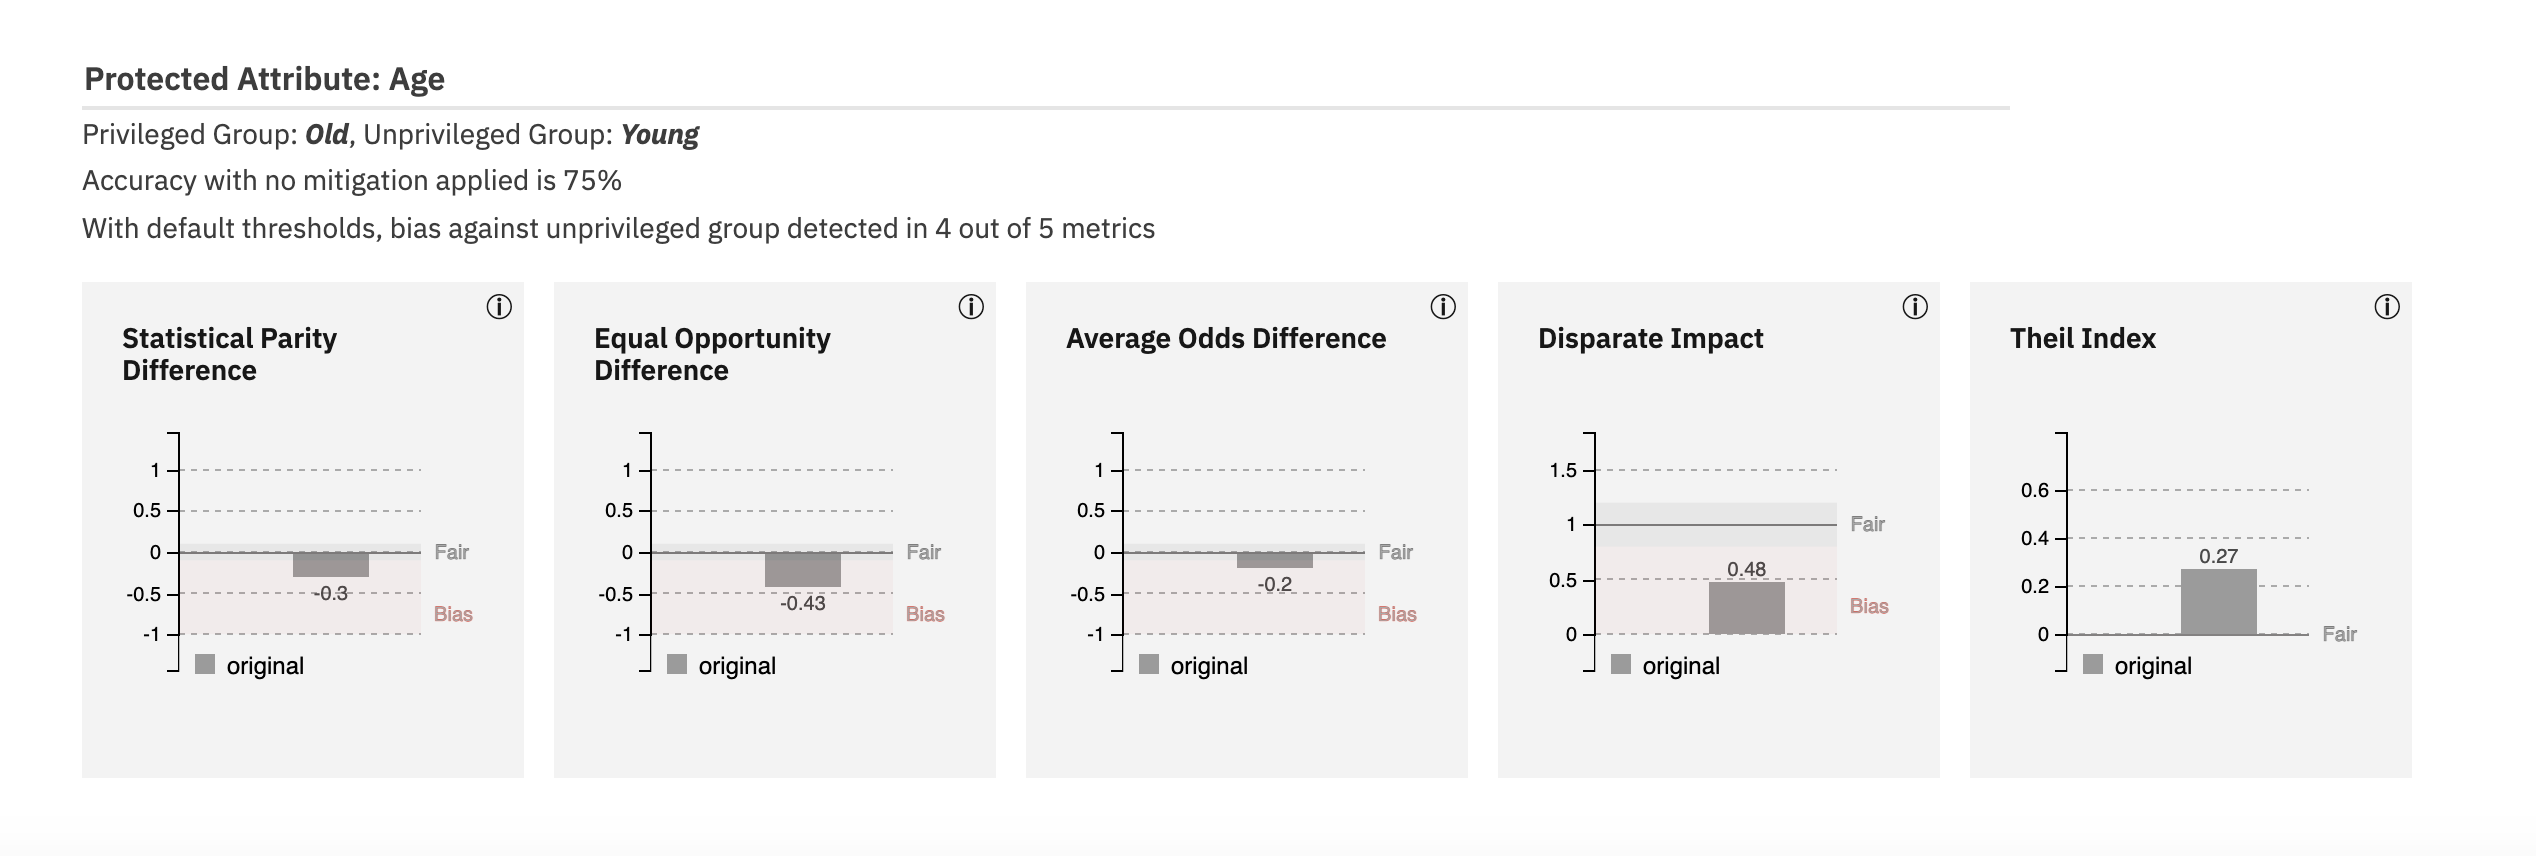

From the above check bias metrics, we could clearly see that attribute **sex** is almost fair, but **age** has bias between subgroups.

In **sex** attribute, when male is considered as the priviledged group while female is unpriviledged group, with default thresholds, bias against unprivileged group is detected in 0 out of 5 metrics.

In **age** attribute, when old people belong to privileged group, while young people belong to unprivileged group, with default thresholds, bias against unprivileged group is detected in 4 out of 5 metrics.

It shows that under different cost matrix and measurement, bias towards different **age** groups is more severe than bias against different **gender** groups. For gender groups bias, it is within reasonable threshold and could be almost regarded as fair, as gender's disparate impact is 0.97, indicating only a slightly higher benefit for the privileged group 'male'; while for age groups' disparate index, is 0.48, indicating much higher benefits for the privileged group 'old'. Considering fairness for this disparate impact metric is between 0.8 and 1.25, we could say that **the `age` is biased, but the `gender` is fair.**

The conclusion is similar to what we have reported in part 1 data exploration. However, we do not have a clear threshold for bias metrics evaluation in part 1, so we are unable to decisively define whether there's bias in gender or age, but only show how much % of less favorable outcomes for the unprivileged groups.

Thinking about the underlying factors that would possibly constitute bias in this scenario, we think social context and environment stereotypes may constitute this bias.

The source of this bias may be a pre-existing bias that is derived from base population's descriptive analysis - if male turns out to earn more than women when we look at the overall population's earning distribution, or old people earn more than young people in a statistically significant way, it is a pre-existing bias carried from our raw data that we input to our prediction model, as opposed to a bias introduced by technical process. To dive deeper, it could be a result of social environment, historical reasons that are rooted from unequal social division of labor forces. Even with the increasing number of women joining the workforce and participating in the economy, there's still an unequal distribution of labor forces rooted from historical patriarchal society. For example, women's role in German society was summed up and circumscribed by the three “K” words: Kinder (children), Kirche (church), and Küche (kitchen). Apart from gender bias, for age, it makes more sense if we consider the threshold to be 25 year old. It is likely that a person under 25 year old is still studying or cannot afford to make a living on his/her own. To the contrary, older people may be more capable of paying back debt and loans, which consequently lead to bias in age.

#### Problem 2.1.2 




List of Metrics and Their Definitions, plus our analysis
* **Statistical Parity Difference**  
    * Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.
        * The ideal value of this metric is 0
        * Fairness for this metric is between -0.1 and 0.1
* **Equal Opportunity Difference**
    * This metric is computed as the difference of true positive rates between the unprivileged and the privileged groups. The true positive rate is the ratio of true positives to the total number of actual positives for a given group.

        * The ideal value is 0. A value of < 0 implies higher benefit for the privileged group and a value > 0 implies higher benefit for the unprivileged group.

* **Average Odds Difference**
     * Computed as average difference of false positive rate (false positives / negatives) and true positive rate (true positives / positives) between unprivileged and privileged groups.

    * The ideal value of this metric is 0. A value of < 0 implies higher benefit for the privileged group and a value > 0 implies higher benefit for the unprivileged group.

    * Fairness for this metric is between -0.1 and 0.1

* **Disparate Impact**
    * Computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.

        * The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group.

        * Fairness for this metric is between 0.8 and 1.25




Comparing these four different metrics, we argue that `Statistical Parity Difference` and `Disparate Impact` are essentially measuring the same aspects of the fairness, by comparing the rate of favorable outcome of unprivileged group with privileged group, with the former metrics using **difference delta** and the latter one using the **ratio and percentage**. Thus the ideal value for the former metrics is 0, and the ideal value for the latter metrics is 1, namely that there's equal favorable outcome for either privileged group and unprivileged group.

Comparing these two metrics, we argue that `Disparate Impact` makes more sense to us by giving comparable results of ratio, instead of absolute rate differences. For example, when the rate of favorable results for both privileged and unprivileged groups are very small, i.e 0.1 and 0.05, their `Statistical Parity Difference` may be only -0.05, making it within the threshold of acceptable range and considered as fair. But if we look at their comparable differences by taking a ratio, it has a `Disparate Impact` of 0.5, making it fall out of the fairness range, which makes more sense as there's a significant difference between the two. Thus, we would choose `Disparate Impact` metrics out of these two.
 
Consider the rate of True Positive Rate and False Positive Rate, `Equal Opportunity Difference` is comparing the TPR, indicating the ratio of person who is credible and is also classified as credible person to the total number of person classified as credible person by credit system. It shows out of all the positive predictions, whether the true positive predictions rate are equal for both privileged and unprivileged groups.
 
At the same time, `Average Odds Difference` considers a step further by taking into account false positive rate, comparing differences between FPR (false positives / negatives) and TPR (true positives / positives). It measures whether there's equal odds between two groups in terms of their respective probability of being classified as credible, under the circumstances of whether they are actually credible, or non-credible.
 
Comparing these two metrics, `Equal Opportunity Difference` puts more emphasis on upside of opportunity, caring more about if this person is indeed good, and the extent that he could be treated fairly. But `Average Odds Difference` puts weightage on both sides, caring about the chance of being classified as good out of all circumstances. The choice of these two metrics would heavily depend on the context and the final decision, actions to make. It depends on whether the action is punitive or assistive, whether the model decision will do harm to individuals or help them. We would say for a credit system, TPR could be more important as it is more important to not let somebody who is credible but couldn't receive debt/loan services. A FN is worse than a FP. Thus we would choose `Equal Opportunity Difference` between these two under this context.

While there's different aspects of measure for four metrics and their pros/cons depend heavily on context, to conclude, we think `Disparate Impact` and `Equal Opportunity Difference` give a better picture of bias investigation in this credit system context.

#### Problem 2.1.3

* **Reweighing**: Weights the examples in each (group, label) combination differently to ensure fairness before classification.
* **Optimized Pre-processing**: Learns a probabilistic transformation that can modify the features and the labels in the training data.
* **Adversarial Debiasing**: Learns a classifier that maximizes prediction accuracy and simultaneously reduces an adversary's ability to determine the protected attribute from the predictions. This approach leads to a fair classifier as the predictions cannot carry any group discrimination information that the adversary can exploit.
* **Reject Option Based Classification**: Changes predictions from a classifier to make them fairer. Provides favorable outcomes to unprivileged groups and unfavorable outcomes to privileged groups in a confidence band around the decision boundary with the highest uncertainty.



Four different debiasing options, all of them are mitigating bias based on different stages in the model. The first two `Reweighing` and `Optimized Pre-processing` are changing the input of mode by reweighting samples or pre-process data labels and features. The `Adversarial Debiasing` and `Reject Option Based Classification` are mitigating bias based on model and prediction outcome by maximizing accuracy or reject option in decision boundary.
 
In our opinion, reweighing based on sample sizes is similar to upsampling, may result in fairer results by giving more weightage to those minority groups that were previously not weighted heavily into decision making. It may sound better than Optimized Pre-processing that directly transforms data features and labels. The first option only changes the weightage but doesn't synthesize or modify the data points itself, whereas the second approach directly transforms the data points. If we are certain that our data is accurate and rigorous in its collection process, the first method may be more appropriate than the second.
 
For the `Adversarial Debiasing` and `Reject Option Based Classification`, they focus on different aspects but all of them aim to achieve a fair result.  The first one not only maximizes the accuracy but also makes the prediction anonymous in terms of protected attribute. It would be hard for an adversary to determine whether  the protected attribute is from privileged group or unprivileged group only with the prediction, indicating that it achieves fairness between this protected attribute. The second approach directly modifies predictions in decision boundaries by giving privileged groups less favorable results, and giving unprivileged groups more favorable results, making their statistical parity metrics approach 0 and disparate impact metrics approach 1. We think both sound appropriate in this context.
 
To conclude, all of them were appropriate with `Optimized Pre-processing` being less ideal in this context.


#### Problem 2.1.4

We choose to view the debiasing result from `Adversarial Debiasing`.
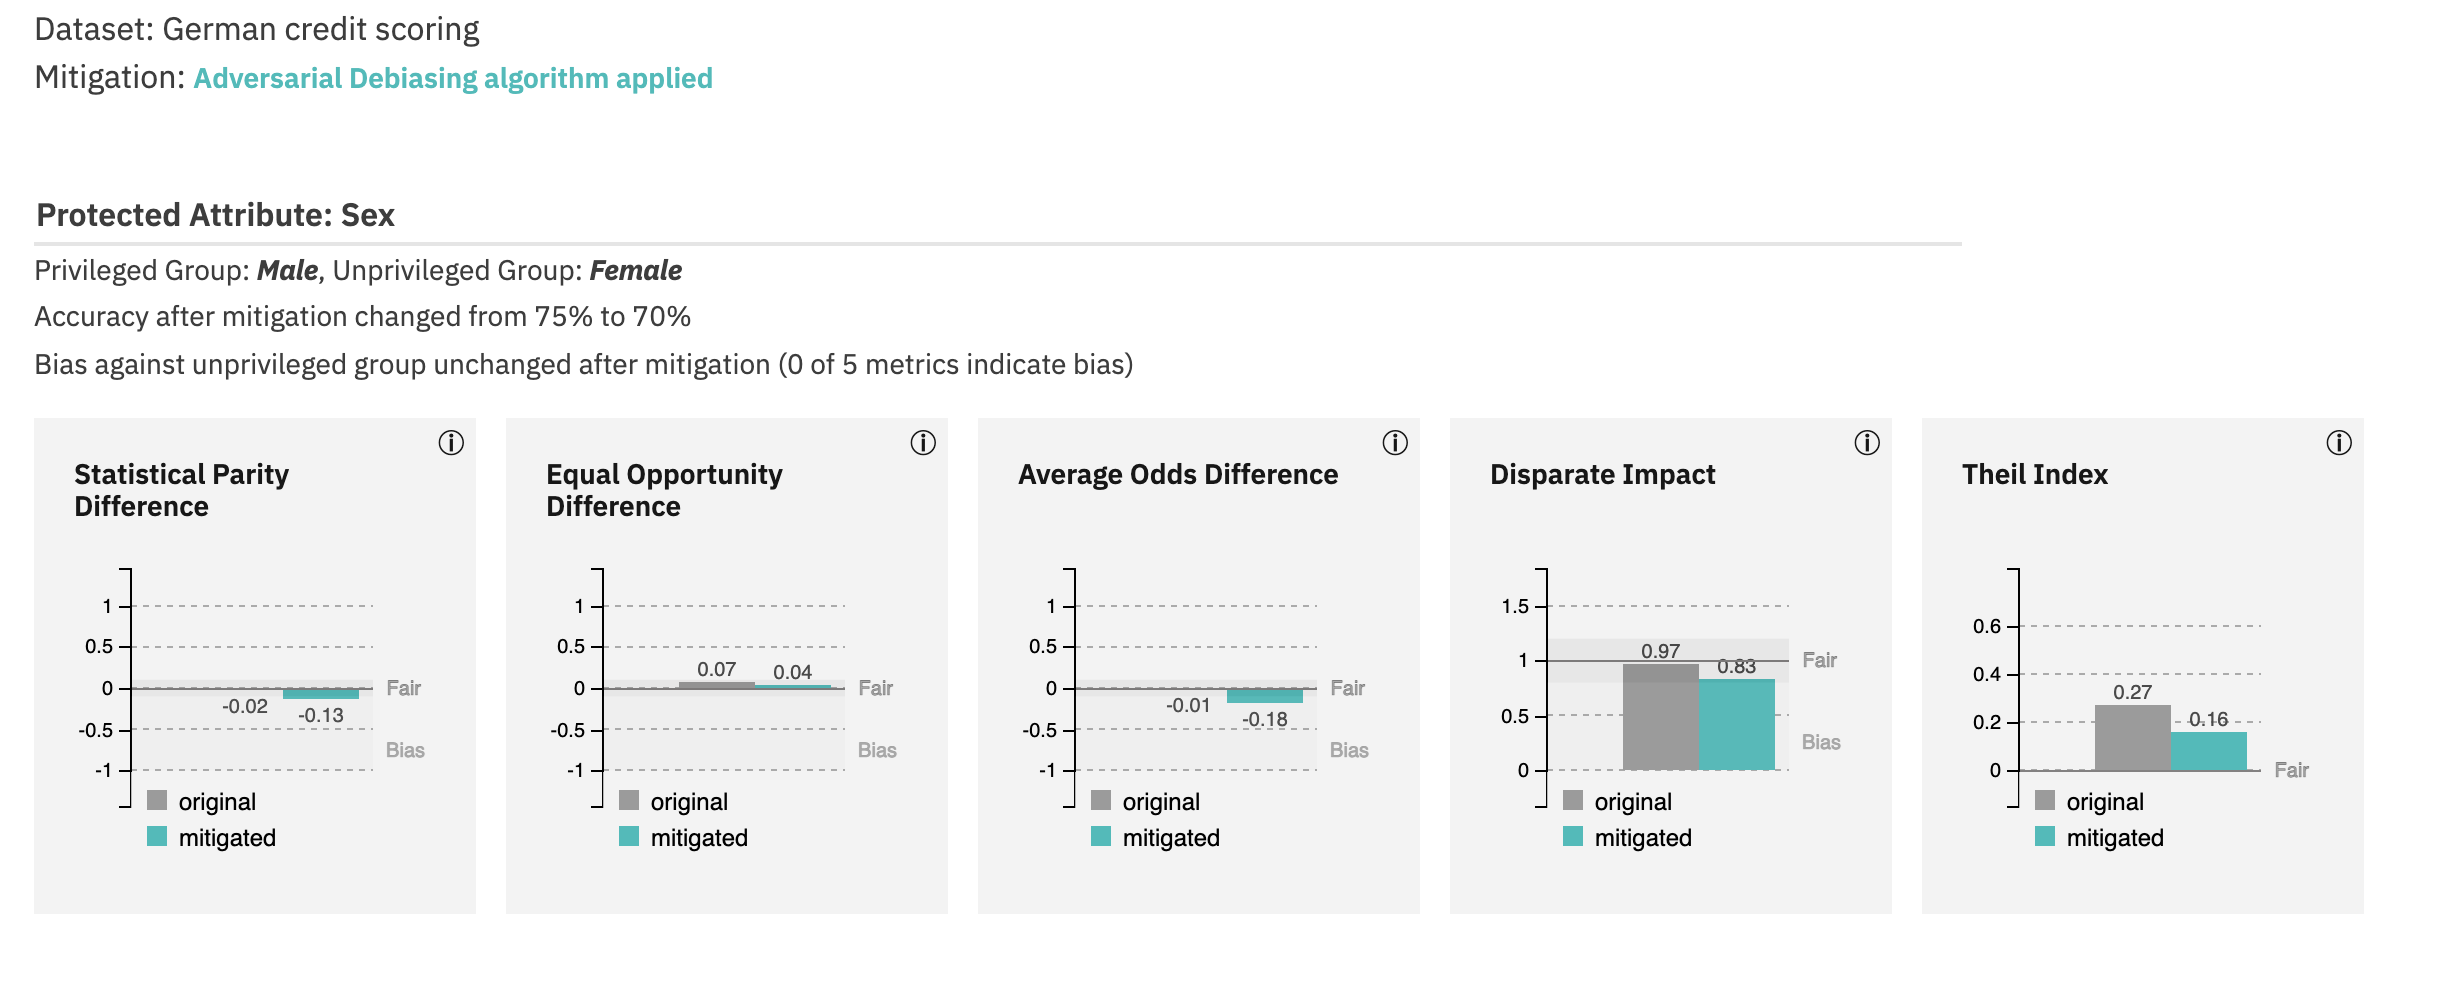
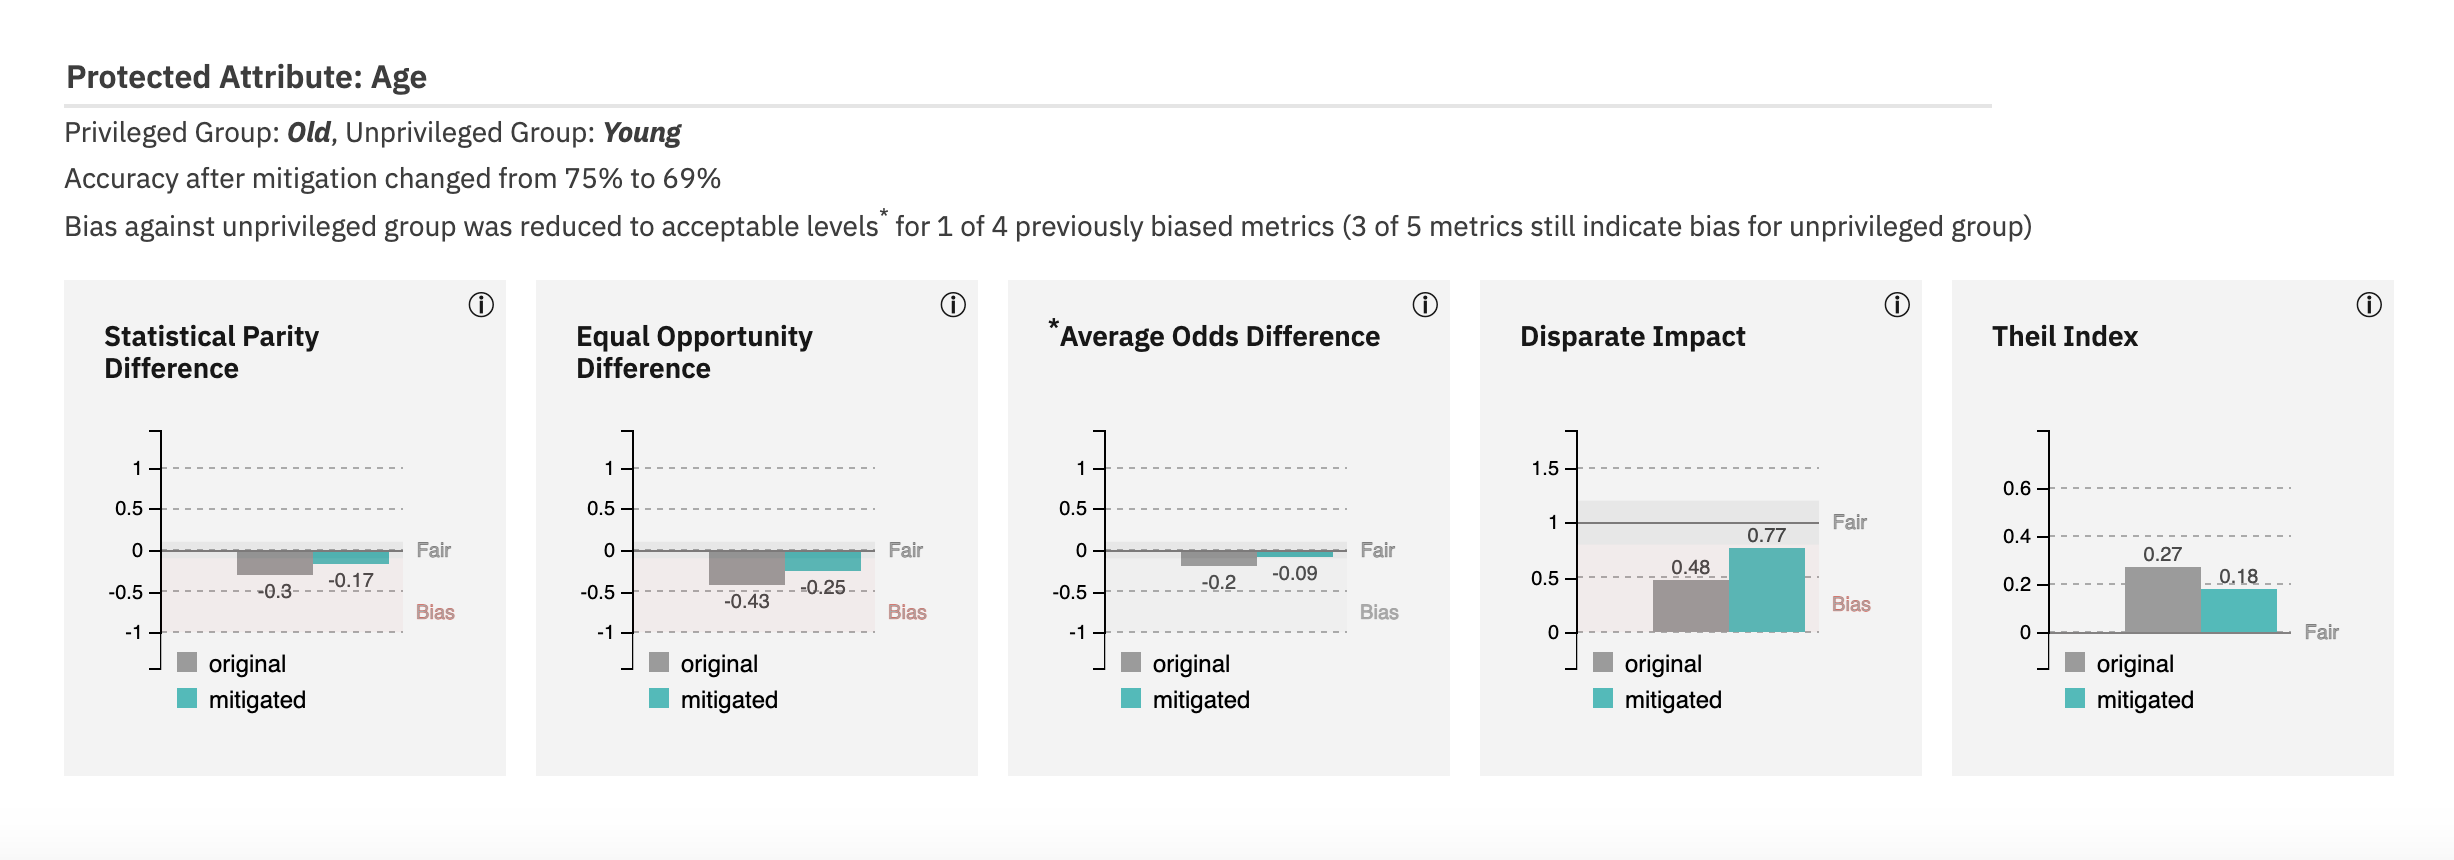

* Did the bias metrics improve? 


We can see that the bias metrics has been improved, in terms of protected attribute `age`, the bias against unprivileged group is reduced to acceptable levels for 1 of 4 previously biased metrics (3 of 5 metrics still indicate bias for the unprivileged groups). 

For attribute `sex`, it remains the same, bias against unprivileged group remains unchanged after mitigation (0 of 5 metrics indicate bias). Thus, overall, this method mitigates a portion of bias in attribute `age` and improved bias metrics.

* What about the metric you considered important? 

In terms of metrics we consider important, which are `Disparate Impact` and `Equal Opportunity Difference`, we learn from the output that both `age` and `sex` have their `Equal Opportunity Difference` metrics improved, approaching the fair value of zero. `Sex` changes from 0.07 to 0.04 after mitigation (within the fair threshold) and `age` changes from -0.43 to -0.25 (still not within the fair range of -0.1 to 0.1). Age shows a less favorable result for the privileged group, though there still exists more benefits towards priviledged group.

On `Disparate Impact` side, `age` improves from 0.48 to 0.77, indicating less favorable benefit for the privileged group, it's close to the fair range but still has room to improve; but for `sex`, the metrics decreases from 0.97 to 0.83, indicating there's slightly more favorable benefits for the priviledged group after mitigation while remaining within the threshold range for being fair.


* Are you satisfied with the result? 

We think the result could be further improved in terms of mitigating bias in `age` group to make it in fairness range. Maybe consider ensemble several bias mitigation methods, as they focus on different aspects of the modeling process. For example, combining the reweighing to adjust for model input, and also change the model prediction accuracy by Adversarial Debiasing, and then also slightly adjust prediction result on decision boundary by using Reject Option Based Classification. This approach might provide us with better and fairer results  for both protected attributes.


* What happened with the overall model accuracy after applying this debiasing method? 

From the above screenshot, we learn that overall model accuracy decreases a bit. If we mitigate bias of `sex`, the overall model accuracy after mitigation changes from 75% to 70%. If we mitigate bias of `age`, the overall model accuracy after mitigation changes from 75% to 69%.


* What is the tension?

According to MacCarthy’s article *Standards of fairness for disparate impact assessment of big data algorithms*, there are broadly **two standards of fairness**, one of which is **group fairness** with advocates aiming at reducing the subordination of disadvantaged groups and allowing for some sacrifice of equal accuracy to protect vulnerable groups. The other standard is **individual fairness** with advocates aiming to avoid arbitrary misclassification of individuals. As we can clearly see in our analysis above, when we attempt to reduce bias of the model in the hope of achieving group fairness, we inevitably introduce inaccuracy (accuracy drops from 75% to 70% for sex and 75% to 69% for age) that theoretically damages individual fairness. Thus, we believe the tension is a trades-off between fairness (group fairness) and accuracy (individual fairness). 

Another tension that we could think of that is particularly relevant in this financial services context is a trades-off between **false positives** (classified someone as good but in reality this person is bad) and **false negatives** (classified someone as bad but in reality this person is good). When considering the consequences of these two directions of misclassification error, we realized that to achieve fairness from the perspective of providers of financial services, it would  be wise to choose a model where the cost for classifying someone as good when they are bad is multiple times worse than classifying someone as bad when they are good. However, there is never one single definition for fairness, as people from different angles view fairness differently. In particular, to achieve fairness from the perspective of a person who applies for loans, it would maximize their benefits if we choose a model where the cost for classifying someone as bad when they are good is multiple times worse than the vice versa. When the interests of different placeholders fail to converge to one model that would benefit all, the tension between false positives and false negatives arises unavoidably. 

#### Problem 2.1.5 

We focus our analysis here on the tension between **group fairness** and **individual fairness**, we first have to emphasize the fact that achieving absolute accuracy is close to impossible. However, the implications of increasing group fairness (decreasing model bias) are profound and far-reaching. Algorithms with bias will put historically disadvantaged groups at a further disadvantage and traditionally marginalized individuals in a further invisible spot. These individuals have already suffered enough from human-made decisions throughout history in almost every aspect of their life, from education to public health, from financial support to resource allocation. It is needless to say the consequences of descrimination when looking at the awful events targeting Asian Americans recently happened across the US. Therefore, we need to correct it when building ML models by reducing biases at a reasonable amount of expense of accuracy, which is exactly what has been observed in our case. 

As we learn from the debiasing method that bias has been reduced significantly without a huge expense of accuracy. Specifically, accuracy for sex reduces from 75% to 70% and that for age reduces from 75% to 69%. Comparing the benefits that would be gained from a higher group fairness such as promoting societal equity, we believe this amount of loss in individual fairness is worthy. Moreover, efforts could be made to increase the accuracy of a model, such as training multiple models, followed by aggregate their decisions and obtaining a majority vote as a final decision. When this is not a perfect world in which everyone can be treated equally, what we could at least do is to treat people who have been historically discriminated and marginalized with more fairness by implementing debiasing methods while building models!

### Problem 2.2

Answer: What would you expect to find in the demo if sex and age were combined to create new privileged/unprivileged groups? What would be your debiasing recommendations in this scenario? Hint: You may find it helpful to run summary statistics and visualizations on the dataset with individuals grouped by both sex and age.

In [7]:
df.head()

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,sex,status=A11,status=A12,status=A13,status=A14,credit_history=A30,credit_history=A31,credit_history=A32,credit_history=A33,credit_history=A34,purpose=A40,purpose=A41,purpose=A410,purpose=A42,purpose=A43,purpose=A44,purpose=A45,purpose=A46,purpose=A48,purpose=A49,savings=A61,savings=A62,savings=A63,savings=A64,savings=A65,employment=A71,employment=A72,employment=A73,employment=A74,employment=A75,other_debtors=A101,other_debtors=A102,other_debtors=A103,property=A121,property=A122,property=A123,property=A124,installment_plans=A141,installment_plans=A142,installment_plans=A143,housing=A151,housing=A152,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202,credit
0,6.0,1169.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,48.0,5951.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0
2,12.0,2096.0,2.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,42.0,7882.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,24.0,4870.0,3.0,4.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0


First, we try to combine both protected attributes and visualize their final credit amount by the new 4 groups, namly old male, old female, young male, young female.

In [8]:
df['age_sex_combination'] = df[['age','sex']].agg(tuple, axis=1)

In [10]:
df.age_sex_combination

0      (1.0, 1.0)
1      (0.0, 0.0)
2      (1.0, 1.0)
3      (1.0, 1.0)
4      (1.0, 1.0)
          ...    
995    (1.0, 0.0)
996    (1.0, 1.0)
997    (1.0, 1.0)
998    (0.0, 1.0)
999    (1.0, 1.0)
Name: age_sex_combination, Length: 1000, dtype: object

In [14]:
df['age_sex_dummy'] = df['age_sex_combination'].factorize()[0]
df.age_sex_dummy

## Thus we have 
## (1.0, 1.0) - dummy group 0
## (0.0, 0.0) - dummy group 1
## (1.0, 0.0) - dummy group 2
## (0.0, 1.0) - dummy group 3

0      0
1      1
2      0
3      0
4      0
      ..
995    2
996    0
997    0
998    3
999    0
Name: age_sex_dummy, Length: 1000, dtype: int64

In [19]:
df.groupby(by=["age_sex_dummy"]).mean()

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,sex,status=A11,status=A12,status=A13,status=A14,credit_history=A30,credit_history=A31,credit_history=A32,credit_history=A33,credit_history=A34,purpose=A40,purpose=A41,purpose=A410,purpose=A42,purpose=A43,purpose=A44,purpose=A45,purpose=A46,purpose=A48,purpose=A49,savings=A61,savings=A62,savings=A63,savings=A64,savings=A65,employment=A71,employment=A72,employment=A73,employment=A74,employment=A75,other_debtors=A101,other_debtors=A102,other_debtors=A103,property=A121,property=A122,property=A123,property=A124,installment_plans=A141,installment_plans=A142,installment_plans=A143,housing=A151,housing=A152,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202,credit
age_sex_dummy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,21.482645,3477.611570,3.056198,2.884298,1.0,1.471074,1.226446,1.0,0.256198,0.249587,0.061157,0.433058,0.039669,0.044628,0.467769,0.114050,0.333884,0.251240,0.120661,0.014876,0.143802,0.261157,0.009917,0.023140,0.047934,0.008264,0.119008,0.585124,0.102479,0.066116,0.044628,0.201653,0.059504,0.117355,0.314050,0.178512,0.330579,0.909091,0.041322,0.049587,0.274380,0.224793,0.312397,0.188430,0.152066,0.049587,0.798347,0.099174,0.760331,0.140496,0.013223,0.190083,0.614876,0.181818,0.542149,0.457851,0.953719,0.046281,1.261157
1,19.561905,2813.761905,2.771429,3.085714,0.0,1.238095,1.019048,0.0,0.352381,0.285714,0.038095,0.323810,0.009524,0.028571,0.723810,0.038095,0.200000,0.190476,0.076190,0.000000,0.304762,0.257143,0.038095,0.028571,0.066667,0.000000,0.038095,0.647619,0.123810,0.038095,0.038095,0.152381,0.057143,0.371429,0.342857,0.161905,0.066667,0.914286,0.047619,0.038095,0.314286,0.285714,0.352381,0.047619,0.123810,0.019048,0.857143,0.523810,0.466667,0.009524,0.028571,0.200000,0.733333,0.038095,0.752381,0.247619,0.990476,0.009524,1.447619
2,19.375610,2910.560976,2.858537,2.756098,1.0,1.370732,1.058537,0.0,0.248780,0.273171,0.078049,0.400000,0.053659,0.068293,0.536585,0.058537,0.282927,0.243902,0.078049,0.014634,0.204878,0.282927,0.009756,0.009756,0.068293,0.014634,0.073171,0.614634,0.092683,0.058537,0.073171,0.160976,0.082927,0.229268,0.346341,0.146341,0.195122,0.912195,0.034146,0.053659,0.273171,0.239024,0.351220,0.136585,0.131707,0.039024,0.829268,0.195122,0.717073,0.087805,0.043902,0.209756,0.585366,0.160976,0.600000,0.400000,0.970732,0.029268,1.302439
3,22.117647,3237.564706,2.905882,2.482353,0.0,1.247059,1.047059,1.0,0.364706,0.376471,0.070588,0.188235,0.047059,0.058824,0.717647,0.035294,0.141176,0.141176,0.070588,0.000000,0.235294,0.435294,0.000000,0.035294,0.000000,0.011765,0.070588,0.647059,0.105882,0.082353,0.023529,0.141176,0.035294,0.176471,0.494118,0.223529,0.070588,0.870588,0.047059,0.082353,0.317647,0.200000,0.400000,0.082353,0.082353,0.082353,0.835294,0.282353,0.670588,0.047059,0.023529,0.247059,0.717647,0.011765,0.776471,0.223529,0.976471,0.023529,1.388235


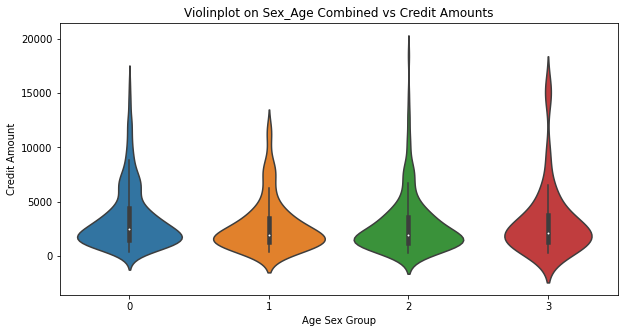

In [17]:
plt.figure(figsize=(10,5))
sns.violinplot(x = df.age_sex_dummy, y=df["credit_amount"])
plt.xlabel('Age Sex Group', fontsize=10)
plt.ylabel('Credit Amount', fontsize=10)
plt.title("Violinplot on Sex_Age Combined vs Credit Amounts")
plt.show()

## Thus we have 
## (1.0, 1.0) - dummy group 0 - (Male, old)
## (0.0, 0.0) - dummy group 1 - (Female, Young)
## (1.0, 0.0) - dummy group 2 - (Male, young)
## (0.0, 1.0) - dummy group 3 - (Female, old)

From the graph and mean table, we can see that old men (group 0) and old women (group 3) are more privileged compared to two middle groups (1 and 2) which are young women and young men respectively. Old men tend to have longer tails in a high range of credit amounts, also with a fat left skewed uneven distribution indicating they are more likely to get a high amount of credit. They also have a higher median and mean compared to the rest. Old women display a similar trend, but maybe slightly less than old man, as the major bias occurs in age but not in sex. Though there's still a bit bias in terms of sex, it is negligble and within fairness range from our above discussion. 

The priviledge to unpriviledge are ranked as:

**Group 0 (Male, old) > Group 3 (Female, old) > Group 2 (Male, Young) > Group 1 (Female, Young)**


I would expect when the `sex` and `age` are combined, the new most priviledged groups is thus `old male`, while the most unpriviledged group is `young female`, with the `young male` and `old female` in between. 
As the priviledged groups are combined for twice with their respective favorable benefits on `old male`, I expect it will be more likely to get highest chance of favorable results, and `young female` will thus get the least possiblilty of getting favorable resutls. The bias will be enlarged with double effect from two protected categories, with age attribute still be the primary contributor to the bias, and plus a slightly addition effect from sex attribute. 

My debiasing recommendation in this scenario will be **combining different debiasing methods** to have a ensembled method, mitigating bias after combining and intersect two protected attributes, to make it in fairness range. As I shared in 2.1.4, we coud consider ensemble several bias mitigation methods, as they focus on different aspects of modeling process. For example, combining the reweighing to adjust for model input, and also change the model prediction accuracy by adversarial Debiasing, and then also slightly adjust prediction result on decision boundary by using Reject Option Based Classification, it might provide us a better and fairer results for both protected attributes.